<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello, my name is Dmitrii. Happy to review your project! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
    
    
- However, there are some comments/areas left to fix that will help you to make your project even better:
    - Add data evaluation.
    - Update graphs. 
    - Add hypotheses. 
  
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

I will wait for you to send me a new version of the project :)

    
</div>

<div class="alert alert-info"> <b>Student comments:</b> Hi Dmitrii, thanks for the input.</div>  

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- Thank you for the comments and improvements in your project. No critical issues left, so your project has been accepted! 
- To learn further about A/B testing, I can recommend the following articles:
  - https://towardsdatascience.com/a-collection-of-a-b-testing-learning-resources-newbie-to-master-6bab1e0d7845 or this cool book "Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing"
  - https://www.dynamicyield.com/lesson/introduction-to-ab-testing/
    
Please keep up the great work and good luck on the next project! 
  
</div>

## Introduction

The purpose of this project is to prioritze hypotheses and analyze the results of a proposed A/B test for an online store. Hypotheses with scores for the reach, impact, confidence and effort is provided. The data of the orders and visits are provided, containing information regarding the transaction ID, visitor ID, the date of the order or visit, the revenue of the order, and the group that the user is in. Conversion rates on an overall and daily bases will be evaluated, as will the revenue from both groups. Statistical significance testing will be done to analyze the effectiveness of the initial hypothesis.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added a detailed description of the project, data and tasks. The description of the project is an important part of the work, as it provides input for the reader (whether it be a peer reviewer or someone from business). At this stage, it is also useful to perform task decomposition.

## Data Preprocessing

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import random

In [97]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')

In [98]:
orders = pd.read_csv('/datasets/orders_us.csv')

In [99]:
visits = pd.read_csv('/datasets/visits_us.csv')

In [100]:
pd.options.display.max_colwidth = 210
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [101]:
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [102]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [103]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [104]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [105]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [106]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [107]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [108]:
orders.duplicated().sum()

0

In [109]:
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [110]:
visits.duplicated().sum()

0

In [111]:
orders['date']=pd.to_datetime(orders['date'])

In [112]:
visits['date']=pd.to_datetime(visits['date'])

## Prioritizing Hypotheses

### ICE

In [113]:
hypotheses['ICE'] = ((hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']).round(2)
hypotheses_ICE = hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
hypotheses_ICE

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
1,Launch your own delivery service. This will shorten delivery time,2.00
5,Add a customer review page. This will increase the number of orders,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12
4,Change the background color on the main page. This will increase user engagement,1.00


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

You can add the following code to display full hypothesis name in the table: 
    
    pd.options.display.max_colwidth = 210


### RICE

In [114]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses_RICE = hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)
hypotheses_RICE

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


### Comparison

The top 5 hypotheses within the ICE and RICE evaluations are the same, but vary in position. RICE is similar to ICE but takes into account the reach of a hypothesis. An interesting note is that hypothesis 8 has the same score between both evaluations, but is first among ICE and fifth among RICE. When taking into account the reach metric, hypothesis 7 far outpaces the rest. Hypothesis 7 is within the top 3 even without reach. So it seems that adding a subscription form to all the main pages is a good course of action.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall great job! The `ICE` and `RICE` frameworks have been calculated correctly. And from the results, it is now clear how the reach factor (Reach) affects the overall value of the hypothesis.

Additionally, it would be really cool to create a pair plot to compare all the metrics for each hypothesis and compare them.
    
For an outside reader (for example, a business customer) it would also be interesting to add a brief description of the frameworks and how they work.
    
Interesting examples of using these methods can be found here:
    https://hackernoon.com/finding-winning-ideas-using-the-confidence-tool-d8f2d8cc2c15

## A/B Test Analysis

### Cumulative Revenue By Group

In [115]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [116]:
orders.group.unique()

array(['B', 'A'], dtype=object)

In [117]:
visits.group.unique()

array(['A', 'B'], dtype=object)

As expected, there are two groups, A and B

In [118]:
orders.date.describe()

/tmp/ipykernel_73/3410979060.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.date.describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

The "orders" dataframe contains dates ranging from August 1 to August 31, 2019.

In [119]:
visits.date.describe()

/tmp/ipykernel_73/3938448413.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits.date.describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

As in the "orders" dataframe, the "visits" dataframe ranges from August 1 to August 31, 2019. 

In [120]:
double_group = orders.groupby(['visitorId'])['group'].unique().reset_index()
double_group

,visitorId,group
0,5114589,[B]
1,6958315,[B]
2,8300375,"[B, A]"
3,11685486,[A]
4,39475350,[B]
...,...,...
1026,4266935830,"[A, B]"
1027,4278982564,[A]
1028,4279090005,[B]
1029,4281247801,[B]


In [121]:
lengths = double_group.group.apply(lambda x: len(x))

In [122]:
lengths

0       1
1       1
2       2
3       1
4       1
       ..
1026    2
1027    1
1028    1
1029    1
1030    1
Name: group, Length: 1031, dtype: int64

In [123]:
double_group = double_group.merge(lengths, on = lengths.index, how = 'left')

In [124]:
double_group

,key_0,visitorId,group_x,group_y
0,0,5114589,[B],1
1,1,6958315,[B],1
2,2,8300375,"[B, A]",2
3,3,11685486,[A],1
4,4,39475350,[B],1
...,...,...,...,...
1026,1026,4266935830,"[A, B]",2
1027,1027,4278982564,[A],1
1028,1028,4279090005,[B],1
1029,1029,4281247801,[B],1


In [125]:
double_group = double_group.rename(columns = {'group_x': 'group', 'group_y': 'length'})

In [126]:
double_group = double_group.drop('key_0', axis = 1)

In [127]:
double_group

,visitorId,group,length
0,5114589,[B],1
1,6958315,[B],1
2,8300375,"[B, A]",2
3,11685486,[A],1
4,39475350,[B],1
...,...,...,...
1026,4266935830,"[A, B]",2
1027,4278982564,[A],1
1028,4279090005,[B],1
1029,4281247801,[B],1


In [128]:
double_group.query('length > 1').count()

visitorId    58
group        58
length       58
dtype: int64

There are 58 visitors that are part of both Group A and Group B. This poses an issue as users should only be a part of one group in order to study the effectiveness of the hypothesis. So, the best course of action is to remove these users from the study.

In [129]:
orders = orders.merge(double_group[['visitorId', 'length']], on = 'visitorId', how = 'left')

In [130]:
orders.head()

,transactionId,visitorId,date,revenue,group,length
0,3667963787,3312258926,2019-08-15,30.4,B,1
1,2804400009,3642806036,2019-08-15,15.2,B,1
2,2961555356,4069496402,2019-08-15,10.2,A,2
3,3797467345,1196621759,2019-08-15,155.1,B,1
4,2282983706,2322279887,2019-08-15,40.5,B,1


In [131]:
orders = orders.drop(orders[orders['length'] > 1].index).reset_index()

In [132]:
orders.head()

,index,transactionId,visitorId,date,revenue,group,length
0,0,3667963787,3312258926,2019-08-15,30.4,B,1
1,1,2804400009,3642806036,2019-08-15,15.2,B,1
2,3,3797467345,1196621759,2019-08-15,155.1,B,1
3,4,2282983706,2322279887,2019-08-15,40.5,B,1
4,5,182168103,935554773,2019-08-15,35.0,B,1


In [133]:
orders_A = orders.query('group == "A"')
orders_A.head()

,index,transactionId,visitorId,date,revenue,group,length
6,7,2626614568,78758296,2019-08-15,20.1,A,1
7,8,1576988021,295230930,2019-08-15,215.9,A,1
9,10,3649131742,879864040,2019-08-15,65.7,A,1
11,12,2809384911,3213223594,2019-08-15,115.4,A,1
13,14,3859315276,1565034404,2019-08-15,170.9,A,1


In [134]:
orders_B = orders.query('group == "B"')
orders_B.head()

,index,transactionId,visitorId,date,revenue,group,length
0,0,3667963787,3312258926,2019-08-15,30.4,B,1
1,1,2804400009,3642806036,2019-08-15,15.2,B,1
2,3,3797467345,1196621759,2019-08-15,155.1,B,1
3,4,2282983706,2322279887,2019-08-15,40.5,B,1
4,5,182168103,935554773,2019-08-15,35.0,B,1


In [135]:
orders_count_A = orders_A.groupby('date')['transactionId'].count().reset_index()
orders_count_A.head()

,date,transactionId
0,2019-08-01,23
1,2019-08-02,19
2,2019-08-03,24
3,2019-08-04,11
4,2019-08-05,22


In [136]:
orders_count_B = orders_B.groupby('date')['transactionId'].count().reset_index()
orders_count_B.head()

,date,transactionId
0,2019-08-01,17
1,2019-08-02,23
2,2019-08-03,14
3,2019-08-04,14
4,2019-08-05,21


In [137]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [138]:
visits_A = visits.query('group == "A"')
visits_A.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [139]:
visits_B = visits.query('group == "B"').reset_index()
visits_B.head()

,index,date,group,visits
0,31,2019-08-01,B,713
1,32,2019-08-02,B,581
2,33,2019-08-03,B,509
3,34,2019-08-04,B,770
4,35,2019-08-05,B,707


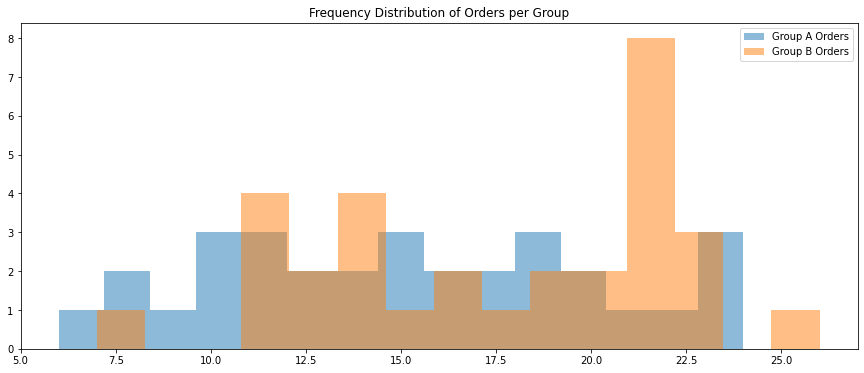

In [140]:
plt.rcParams["figure.figsize"] = (15,6)
plt.hist(orders_count_A.transactionId, bins = 15, alpha=0.5, label='Group A Orders')
plt.hist(orders_count_B.transactionId, bins = 15, alpha=0.5, label='Group B Orders')
plt.legend(loc='upper right')
plt.title('Frequency Distribution of Orders per Group')
plt.show()

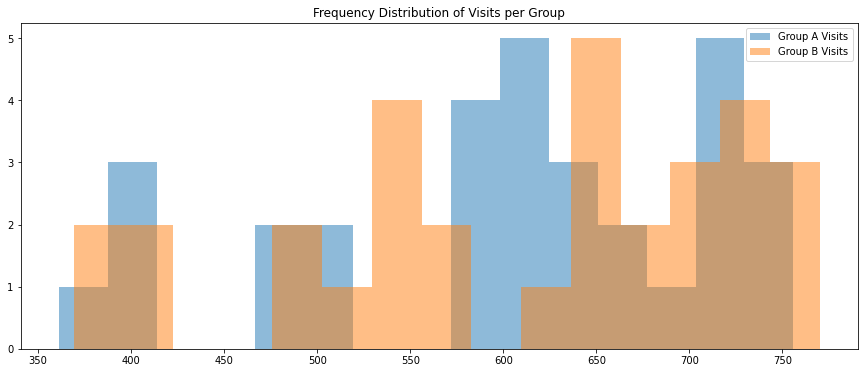

In [141]:
plt.rcParams["figure.figsize"] = (15,6)
plt.hist(visits_A.visits, bins = 15, alpha=0.5, label='Group A Visits')
plt.hist(visits_B.visits, bins = 15, alpha=0.5, label='Group B Visits')
plt.legend(loc='upper right')
plt.title('Frequency Distribution of Visits per Group')
plt.show()

In [142]:
total_rev = orders.groupby(['date','group'])['revenue'].sum().reset_index()


In [143]:
total_rev.head()

,date,group,revenue
0,2019-08-01,A,2266.6
1,2019-08-01,B,967.2
2,2019-08-02,A,1468.3
3,2019-08-02,B,2568.1
4,2019-08-03,A,1815.2


In [144]:
total_rev_A = total_rev.query('group == "A"')

In [145]:
total_rev_B = total_rev.query('group == "B"')

In [146]:
total_rev_A.head()

,date,group,revenue
0,2019-08-01,A,2266.6
2,2019-08-02,A,1468.3
4,2019-08-03,A,1815.2
6,2019-08-04,A,675.5
8,2019-08-05,A,1398.0


In [147]:
total_rev_B.head()

,date,group,revenue
1,2019-08-01,B,967.2
3,2019-08-02,B,2568.1
5,2019-08-03,B,1071.6
7,2019-08-04,B,1531.6
9,2019-08-05,B,1449.3


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
It could be helpful to add a basic data validation. It could be interesting to check:

- Confirm the number of groups in the A/B test and for what period data is available to us (test start and end dates).
- Look at the distribution of the number of users in each group.
- Check if our users fall into both groups and decide what to do with them.
    
    

<div class="alert alert-info"> <b>Student comments:</b> Added above, starting from the beginning of the section. </div>  

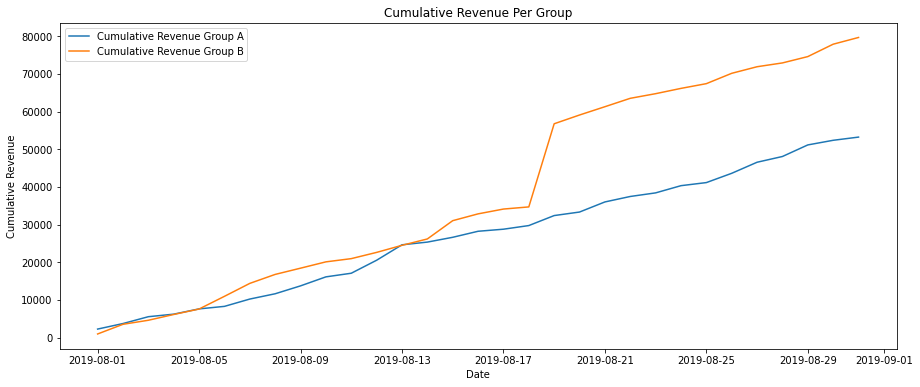

In [148]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(total_rev_A['date'],total_rev_A['revenue'].cumsum(), label='Cumulative Revenue Group A')
plt.plot(total_rev_B['date'],total_rev_B['revenue'].cumsum(), label='Cumulative Revenue Group B')
plt.legend()
plt.title('Cumulative Revenue Per Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue');

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
   
Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.
    
Can you please add titles to your graphs?

<div class="alert alert-info"> <b>Student comments:</b> Added </div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
That looks great. Thank you for updating your graphs. 

The cumulative revenue of groups A and B start out similarly, but that of Group B's starts to jump ahead on August 5th. There is a large jump on August 19th, putting the cumulative revenue of Group B far ahead of Group A all through the rest of the collected timeframe.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct conclusions.

### Cumulative Average Order Size By Group

In [149]:
avg_rev = orders.groupby(['date','group'])['revenue'].mean().reset_index()

In [150]:
print(avg_rev.head(),avg_rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     62 non-null     datetime64[ns]
 1   group    62 non-null     object        
 2   revenue  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.6+ KB
        date group     revenue
0 2019-08-01     A   98.547826
1 2019-08-01     B   56.894118
2 2019-08-02     A   77.278947
3 2019-08-02     B  111.656522
4 2019-08-03     A   75.633333 None


In [151]:
avg_rev_A = avg_rev.query('group == "A"')
avg_rev_B = avg_rev.query('group == "B"')

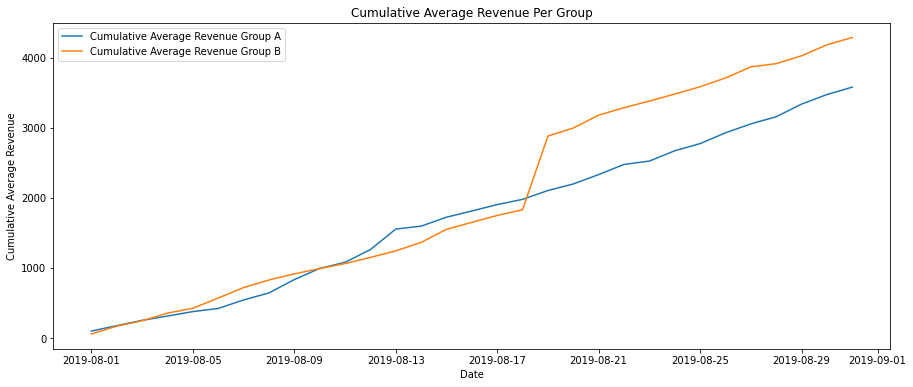

In [152]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(avg_rev_A['date'],avg_rev_A['revenue'].cumsum(), label='Cumulative Average Revenue Group A')
plt.plot(avg_rev_B['date'],avg_rev_B['revenue'].cumsum(), label='Cumulative Average Revenue Group B')
plt.legend()
plt.title('Cumulative Average Revenue Per Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Revenue');

The average order size per day are similar between both groups until the large spike on August 19th. This spike is definitely an anomoly, as the rate of change of the cumulative average revenue seem to be almost identical between both groups.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Agree with your conclusions. 

### Difference in Cumulative Average Order Size of Group B Relative to Group A

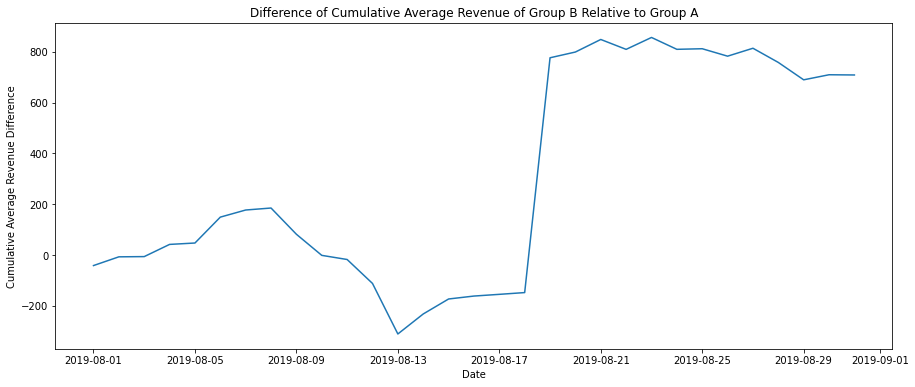

In [153]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(avg_rev['date'].unique(),(avg_rev_B.reset_index().cumsum()['revenue'])-(avg_rev_A.reset_index().cumsum()['revenue']))
         
plt.title('Difference of Cumulative Average Revenue of Group B Relative to Group A')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Revenue Difference');

The difference of the cumulative average revenue depicted above show that both Group B had a higher average revenue starting out, but then Group A overtook with a "valley" on August 13th. However, with the spike at August 19th, Group B far outweighed Group A maintained a high difference throughout.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed, it could be helpful to study data without outliers. Also, interesting to note that difference has been stabilized in the last couple of days.

### Conversion Rates Per Group: Ratio of number of orders to the number of visitors per day

Overall Conversion:

In [154]:
print(orders_count_A['transactionId'].sum(), 'total orders of Group A')
print(visits_A['visits'].sum(), 'total visits of Group A')
print(orders_count_A['transactionId'].sum()/visits_A['visits'].sum(), 'Group A conversion rate')

468 total orders of Group A
18736 total visits of Group A
0.02497865072587532 Group A conversion rate


In [155]:
print(orders_count_B['transactionId'].sum(), 'total orders of Group B')
print(visits_B['visits'].sum(), 'total visits of Group B')
print(orders_count_B['transactionId'].sum()/visits_B['visits'].sum(), 'Group B conversion rate')

548 total orders of Group B
18916 total visits of Group B
0.02897018397124128 Group B conversion rate


Daily Conversion:

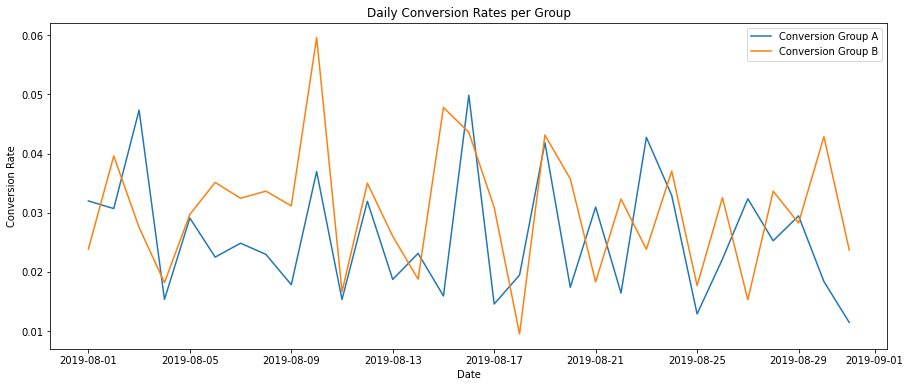

In [156]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(visits_A['date'],orders_count_A['transactionId']/visits_A['visits'],
         label='Conversion Group A')
plt.plot(visits_B['date'],orders_count_B['transactionId']/visits_B['visits'],
         label='Conversion Group B')
plt.legend();
plt.title('Daily Conversion Rates per Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate');

The daily conversion rates for each group appear to vary in a somewhat similar fashion. Besides the range from August 5th to August 11th where Group B had higher conversion rates, both groups follow similar trends.

### Orders per user

In [157]:
orders_per_user = orders.groupby(['visitorId'])['transactionId'].count().to_frame().reset_index()

In [158]:
orders_per_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   visitorId      973 non-null    int64
 1   transactionId  973 non-null    int64
dtypes: int64(2)
memory usage: 15.3 KB


In [159]:
orders_per_user['transactionId'].where(orders_per_user['transactionId']>1).count()

36

In [160]:
orders_per_user.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [161]:
orders = orders.merge(orders_per_user, on = 'visitorId')

In [162]:
orders = orders.rename(columns={'transactionId_x': 'transactionId', 'transactionId_y': 'orders_per_visitor'})

In [163]:
orders.head()

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
0,0,3667963787,3312258926,2019-08-15,30.4,B,1,1
1,1,2804400009,3642806036,2019-08-15,15.2,B,1,1
2,3,3797467345,1196621759,2019-08-15,155.1,B,1,1
3,4,2282983706,2322279887,2019-08-15,40.5,B,1,1
4,5,182168103,935554773,2019-08-15,35.0,B,1,1


In [164]:
orders[orders['orders_per_visitor']>1]

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
14,15,2550768810,2742574263,2019-08-15,235.0,B,1,3
15,91,3176574859,2742574263,2019-08-22,275.9,B,1,3
16,840,234238251,2742574263,2019-08-21,150.4,B,1,3
63,74,3721196264,249864742,2019-08-16,15.0,B,1,3
64,373,4140190337,249864742,2019-08-24,10.5,B,1,3
...,...,...,...,...,...,...,...,...
814,947,2128508695,2733145037,2019-08-21,105.5,A,1,2
822,955,3143300221,4134830387,2019-08-28,40.1,B,1,2
823,1048,4057562044,4134830387,2019-08-11,30.5,B,1,2
950,1112,1149756812,1985475298,2019-08-12,5.5,B,1,2


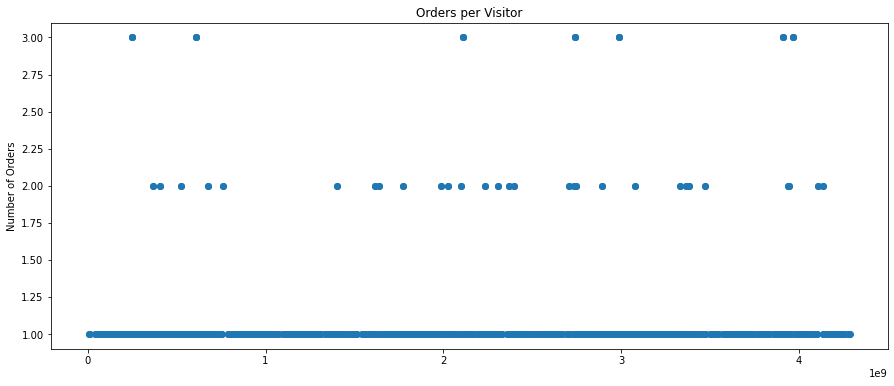

In [165]:
plt.scatter(orders['visitorId'], orders['orders_per_visitor']);
plt.title('Orders per Visitor')
plt.ylabel('Number of Orders');

Above is the overall scatter plot for the number of orders per visitor. Some outliers can be seen.

In [166]:
if orders['orders_per_visitor'].mean()>orders['orders_per_visitor'].median():
     print('The distribution is skewed to the right')
else:
    print('The distribution is skewed to the left')
# Percentile Technique
print('---------------------------------------')
print('Percentile Technique:')
print('---------------------------------------')
print('Statistics on: {}'.format('orders_per_visitor'))
print(orders['orders_per_visitor'].describe())
ninety_nine = np.percentile(orders['orders_per_visitor'], 99).round()
ninety_five = np.percentile(orders['orders_per_visitor'], 95).round()
five = np.percentile(orders['orders_per_visitor'], 5).round()
print('---------------------------------------')
print('99 Percentile:')
print('min border:',five)
print('max border:',ninety_nine)
# print('The outliers are considered to be values below', five, "and above",ninety_five)
print('The outliers are considered to be values above', ninety_nine)
print('We have',len(orders[(orders['orders_per_visitor']<five)|(orders['orders_per_visitor']>ninety_nine)]),"values that we can consider outliers")
print('---------------------------------------')
print('95 Percentile:')
print('min border:',five)
print('max border:',ninety_five)
# print('The outliers are considered to be values below', five, "and above",ninety_five)
print('The outliers are considered to be values above', ninety_five)
print('We have',len(orders[(orders['orders_per_visitor']<five)|(orders['orders_per_visitor']>ninety_five)]),"values that we can consider outliers")

The distribution is skewed to the right
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: orders_per_visitor
count    1016.000000
mean        1.098425
std         0.360838
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: orders_per_visitor, dtype: float64
---------------------------------------
99 Percentile:
min border: 1.0
max border: 3.0
The outliers are considered to be values above 3.0
We have 0 values that we can consider outliers
---------------------------------------
95 Percentile:
min border: 1.0
max border: 2.0
The outliers are considered to be values above 2.0
We have 21 values that we can consider outliers


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You correctly identified 95th and 99th percentiles. 

Applying 95th percentile filter:

In [167]:
orders_95 = orders[orders['orders_per_visitor'] <= 5]

In [168]:
orders_95.head()

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
0,0,3667963787,3312258926,2019-08-15,30.4,B,1,1
1,1,2804400009,3642806036,2019-08-15,15.2,B,1,1
2,3,3797467345,1196621759,2019-08-15,155.1,B,1,1
3,4,2282983706,2322279887,2019-08-15,40.5,B,1,1
4,5,182168103,935554773,2019-08-15,35.0,B,1,1


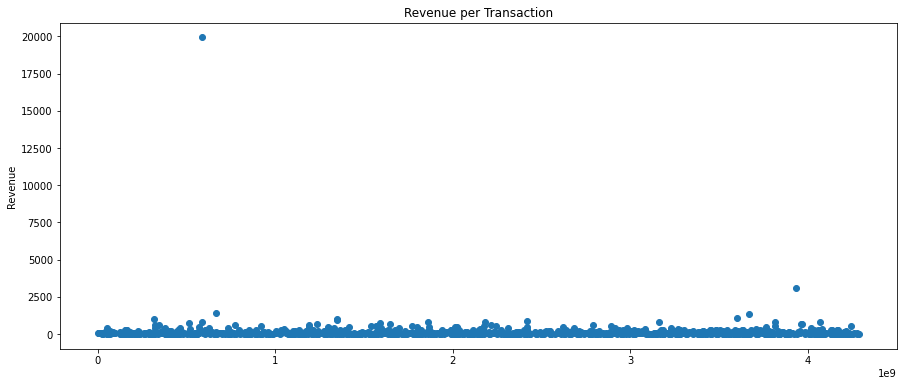

In [169]:
plt.scatter(orders['transactionId'], orders['revenue']);
plt.title('Revenue per Transaction')
plt.ylabel('Revenue');

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)
    
And also you could check another scaterplot but without outliers. 

A clear outlier can be seen in the above scatter chart of revenue per order.

In [170]:
orders.query('revenue > 17500')

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
376,425,590470918,1920142716,2019-08-19,19920.4,B,1,1


As expected, this single outlier coincides with the August 19th spikes we saw previously.

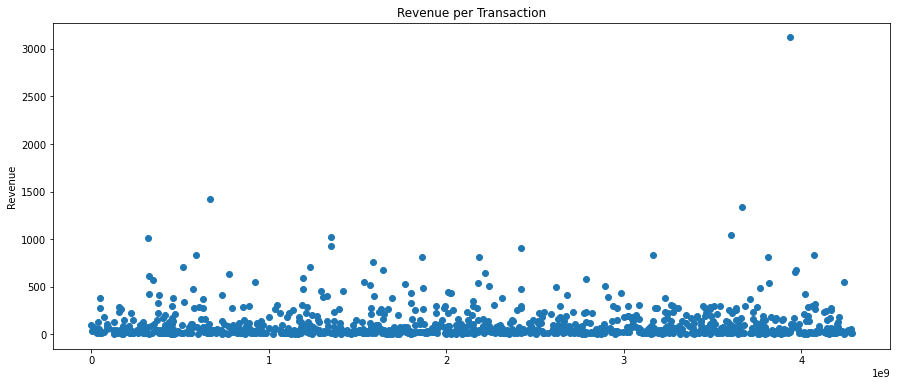

In [171]:
plt.scatter(orders['transactionId'].drop(376), orders['revenue'].drop(376));
plt.title('Revenue per Transaction')
plt.ylabel('Revenue');

Above is a scatter chart without the major outlier of August 19th. This can give better insight into the majority of data.

In [172]:
if orders['revenue'].mean()>orders['revenue'].median():
     print('The distribution is skewed to the right')
else:
    print('The distribution is skewed to the left')
# Percentile Technique
print('---------------------------------------')
print('Percentile Technique:')
print('---------------------------------------')
print('Statistics on: {}'.format('revenue'))
print(orders['revenue'].describe())
ninety_nine = np.percentile(orders['revenue'], 99).round()
ninety_five = np.percentile(orders['revenue'], 95).round()
five = np.percentile(orders['revenue'], 5).round()
print('---------------------------------------')
print('99 Percentile:')
print('min border:',five)
print('max border:',ninety_nine)
# print('The outliers are considered to be values below', five, "and above",ninety_five)
print('The outliers are considered to be values above', ninety_nine)
print('We have',len(orders[(orders['revenue']<five)|(orders['revenue']>ninety_nine)]),"values that we can consider outliers")
print('---------------------------------------')
print('95 Percentile')
print('min border:',five)
print('max border:',ninety_five)
print('The outliers are considered to be values below', five, "and above",ninety_five)
#print('The outliers are considered to be values above', ninety_five)
print('We have',len(orders[(orders['revenue']<five)|(orders['revenue']>ninety_five)]),"values that we can consider outliers")

The distribution is skewed to the right
---------------------------------------
Percentile Technique:
---------------------------------------
Statistics on: revenue
count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64
---------------------------------------
99 Percentile:
min border: 6.0
max border: 830.0
The outliers are considered to be values above 830.0
We have 66 values that we can consider outliers
---------------------------------------
95 Percentile
min border: 6.0
max border: 414.0
The outliers are considered to be values below 6.0 and above 414.0
We have 105 values that we can consider outliers


Applying 95th percentile filter:

In [173]:
orders_95 = orders_95[orders_95['revenue'] <= 436]
orders_95.head()

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
0,0,3667963787,3312258926,2019-08-15,30.4,B,1,1
1,1,2804400009,3642806036,2019-08-15,15.2,B,1,1
2,3,3797467345,1196621759,2019-08-15,155.1,B,1,1
3,4,2282983706,2322279887,2019-08-15,40.5,B,1,1
4,5,182168103,935554773,2019-08-15,35.0,B,1,1


In [174]:
orders_A_95 = orders_95.query('group == "A"')
orders_A_95.head()

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
6,7,2626614568,78758296,2019-08-15,20.1,A,1,1
7,8,1576988021,295230930,2019-08-15,215.9,A,1,1
9,10,3649131742,879864040,2019-08-15,65.7,A,1,1
11,12,2809384911,3213223594,2019-08-15,115.4,A,1,1
13,14,3859315276,1565034404,2019-08-15,170.9,A,1,1


In [175]:
orders_B_95 = orders_95.query('group == "B"')
orders_B_95.head()

,index,transactionId,visitorId,date,revenue,group,length,orders_per_visitor
0,0,3667963787,3312258926,2019-08-15,30.4,B,1,1
1,1,2804400009,3642806036,2019-08-15,15.2,B,1,1
2,3,3797467345,1196621759,2019-08-15,155.1,B,1,1
3,4,2282983706,2322279887,2019-08-15,40.5,B,1,1
4,5,182168103,935554773,2019-08-15,35.0,B,1,1


In [176]:
orders_count_A_95 = orders_A_95.groupby('date')['transactionId'].count().reset_index()
orders_count_A_95.head()

,date,transactionId
0,2019-08-01,21
1,2019-08-02,19
2,2019-08-03,24
3,2019-08-04,11
4,2019-08-05,22


In [177]:
orders_count_B_95 = orders_B_95.groupby('date')['transactionId'].count().reset_index()
orders_count_B_95.head()

,date,transactionId
0,2019-08-01,17
1,2019-08-02,21
2,2019-08-03,14
3,2019-08-04,13
4,2019-08-05,20


In [178]:
avg_rev_95 = orders_95.groupby(['date','group'])['revenue'].mean().reset_index()

In [179]:
print(avg_rev_95.head(),avg_rev_95.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     62 non-null     datetime64[ns]
 1   group    62 non-null     object        
 2   revenue  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.6+ KB
        date group    revenue
0 2019-08-01     A  65.261905
1 2019-08-01     B  56.894118
2 2019-08-02     A  77.278947
3 2019-08-02     B  71.547619
4 2019-08-03     A  75.633333 None


In [180]:
avg_rev_A_95 = avg_rev_95.query('group == "A"')
avg_rev_B_95 = avg_rev.query('group == "B"')

### Testing for Statistical Significance

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Сould you please formulate null and an alternative hypothesis for each question before actual testing in the markdown box and add short interim conclusions after each test: 
   
    H0: 
    H1:
 

<div class="alert alert-info"> <b>Student comments:</b> Added below</div>  

#### Overall conversion raw data

H0: The overall conversion proportions between both groups are equal. <br>
H1: The overall conversion proportions between both groups are not equal.

In [181]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)


In [182]:
check_hypothesis(orders_count_A['transactionId'].sum(),visits_A['visits'].sum(), orders_count_B['transactionId'].sum(), visits_B['visits'].sum(), alpha=0.05)

p-value:  0.016851380434703023


In [183]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([orders_count_A['transactionId'].sum(),orders_count_B['transactionId'].sum()], [visits_A['visits'].sum(), visits_B['visits'].sum()])
print('stat =',stat, ', pval =', pval)

stat = -2.3899344431697442 , pval = 0.01685138043470311


In [184]:
proportions_ztest([orders_count_A['transactionId'].sum(),orders_count_B['transactionId'].sum()], [visits_A['visits'].sum(), visits_B['visits'].sum()])

(-2.3899344431697442, 0.01685138043470311)

Reject H0

The overall conversion proportions between both groups are not equal.

#### Daily conversion raw data

H0: The daily conversions of each group are equal. <br>
H1: The daily conversions of each group are not equal.

In [185]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')
    

In [186]:
testing_average(orders_count_A['transactionId']/visits_A['visits'], orders_count_B['transactionId']/visits_B['visits'],alpha=0.05)

0.09573715593918651
Fail to Reject H0


The daily conversions of each group are equal.

#### Daily average order size raw data

H0: The daily average order size of both groups are equal. <br>
H1: The daily average order size of both groups are not equal.

In [187]:
testing_average(avg_rev_A['revenue'], avg_rev_B['revenue'],alpha=0.05)

0.9550914317372012
Fail to Reject H0


The daily average order size of both groups are equal.

#### Overall conversion filtered data

H0: The overall conversion proportions between both groups are equal. <br>
H1: The overall conversion proportions between both groups are not equal.

In [188]:
proportions_ztest([orders_count_A_95['transactionId'].sum(),orders_count_B_95['transactionId'].sum()], [visits_A['visits'].sum(), visits_B['visits'].sum()])

(-2.290220363609133, 0.022008545542710034)

Reject H0

The overall conversion proportions between both groups are not equal.

#### Daily conversion filtered data

H0: The daily conversions of each group are equal. <br>
H1: The daily conversions of each group are not equal.

In [189]:
testing_average(orders_count_A_95['transactionId']/visits_A['visits'], orders_count_B_95['transactionId']/visits_B['visits'],alpha=0.05)

0.044089805589921725
Reject H0


The daily conversions of each group are not equal.

#### Daily average order size filtered data

H0: The daily average order size of both groups are equal. <br>
H1: The daily average order size of both groups are not equal.

In [190]:
testing_average(avg_rev_A_95['revenue'], avg_rev_B_95['revenue'],alpha=0.05)

0.005790753275601371
Reject H0


The daily average order size of both groups are not equal.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
You got correct results for all tests.

I also want to add that the Mann-Whitney test is rank-based, so it is robust to outliers. This means that the data is ranked, an outlier will simply be recognized as a case that ranks one above (or below) the next observation, so outliers do not have a strong effect on the p-value.

## Conclusion

The overall conversion rates of each group using all of the data were deemed to be significantly different from each other. However, when evaluating the converion rates on a daily basis, it was found that the differences in the conversion rates did not vary significantly. The daily average order size was similarly deemed to not be significantly different between both groups. 

After conducting the same analysis with data filtered to remove outliers, there was a change in the results. While the overall conversion was deemed to be siginficantly different (as was the case for the raw data), the daily conversion and the daily average order size were also found to be significantly different between both groups in this case. With these findings, we can conclude that Group B has higher results and stop the test.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 



Thank you for your work 🤝

You did a great research with correct intermediate conclusions, clean code and good visualization. You managed to correctly apply the frameworks for testing hypotheses, identify anomalies in the data and perform all the statistical tests.

I also fully agree with your test results. In this project, you can fall into the "peeking problem" and wait until there is a difference in metrics, but doing so is wrong. You can read more here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    


    
</div>